In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../zippedData/merged_data.csv")
df

# merged on "year"

,Unnamed: 0,title,profit,prod_budget,dom_gross,world_gross,genre_ids,genres,director,writer,runtime_min,release_date
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,"[28, 12, 14, 878]",NaN,NaN,NaN,NaN,2009-12-18
1,1,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]","Action,Adventure,Fantasy",Rob Marshall,Stuart Beattie,136.0,2011-05-20
2,2,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]","Action,Adventure,Fantasy",Rob Marshall,Ted Elliott,136.0,2011-05-20
3,3,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]","Action,Adventure,Fantasy",Rob Marshall,Tim Powers,136.0,2011-05-20
4,4,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]","Action,Adventure,Fantasy",Rob Marshall,Terry Rossio,136.0,2011-05-20
...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9444,red 11,-7.000000e+03,7000.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,2018-12-31
9081,9445,following,2.344950e+05,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,NaN,1999-04-02
9082,9446,return to the land of wonders,-3.662000e+03,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,NaN,2005-07-13
9083,9447,a plague so pleasant,-1.400000e+03,1400.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,2015-09-29


In [20]:
genre_dictionary = [{"id":28,"name":"Action"},
                              {"id":12,"name":"Adventure"},
                              {"id":16,"name":"Animation"},
                              {"id":35,"name":"Comedy"},
                              {"id":80,"name":"Crime"},
                              {"id":99,"name":"Documentary"},
                              {"id":18,"name":"Drama"},
                              {"id":10751,"name":"Family"},
                              {"id":14,"name":"Fantasy"},
                              {"id":36,"name":"History"},
                              {"id":27,"name":"Horror"},
                              {"id":10402,"name":"Music"},
                              {"id":9648,"name":"Mystery"},
                              {"id":10749,"name":"Romance"},
                              {"id":878,"name":"Science Fiction"},
                              {"id":10770,"name":"TV Movie"},
                              {"id":53,"name":"Thriller"},
                              {"id":10752,"name":"War"},
                              {"id":37,"name":"Western"}]

In [21]:
df.genre_ids = df.genre_ids.str.strip('\[\]').str.replace(" ", "").str.strip().str.split(',')
df = df.explode('genre_ids')
df.genre_ids = df.genre_ids.replace(r'^\s*$', np.nan, regex=True)
df.genre_ids.astype('float')
def find_genre(key):
    if key is np.nan:
        return 'None'
    for dictionary in genre_dictionary:
        if dictionary['id'] == int(key):
            return dictionary['name']
    return 'None'
df.genre_ids = df.genre_ids.apply(lambda x: find_genre(x))

In [22]:
df

,Unnamed: 0,title,profit,prod_budget,dom_gross,world_gross,genre_ids,genres,director,writer,runtime_min,release_date
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Action,NaN,NaN,NaN,NaN,2009-12-18
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Adventure,NaN,NaN,NaN,NaN,2009-12-18
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Fantasy,NaN,NaN,NaN,NaN,2009-12-18
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Science Fiction,NaN,NaN,NaN,NaN,2009-12-18
1,1,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,Adventure,"Action,Adventure,Fantasy",Rob Marshall,Stuart Beattie,136.0,2011-05-20
...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9444,red 11,-7.000000e+03,7000.0,0.0,0.000000e+00,None,NaN,NaN,NaN,NaN,2018-12-31
9081,9445,following,2.344950e+05,6000.0,48482.0,2.404950e+05,None,NaN,NaN,NaN,NaN,1999-04-02
9082,9446,return to the land of wonders,-3.662000e+03,5000.0,1338.0,1.338000e+03,None,NaN,NaN,NaN,NaN,2005-07-13
9083,9447,a plague so pleasant,-1.400000e+03,1400.0,0.0,0.000000e+00,None,NaN,NaN,NaN,NaN,2015-09-29


In [23]:
df["ROI"] = (df["profit"] / df["prod_budget"]) * 100

In [24]:
df

,Unnamed: 0,title,profit,prod_budget,dom_gross,world_gross,genre_ids,genres,director,writer,runtime_min,release_date,ROI
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Action,NaN,NaN,NaN,NaN,2009-12-18,553.257713
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Adventure,NaN,NaN,NaN,NaN,2009-12-18,553.257713
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Fantasy,NaN,NaN,NaN,NaN,2009-12-18,553.257713
0,0,avatar,2.351345e+09,425000000.0,760507625.0,2.776345e+09,Science Fiction,NaN,NaN,NaN,NaN,2009-12-18,553.257713
1,1,pirates of the caribbean on stranger tides,6.350639e+08,410600000.0,241063875.0,1.045664e+09,Adventure,"Action,Adventure,Fantasy",Rob Marshall,Stuart Beattie,136.0,2011-05-20,154.667286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9444,red 11,-7.000000e+03,7000.0,0.0,0.000000e+00,None,NaN,NaN,NaN,NaN,2018-12-31,-100.000000
9081,9445,following,2.344950e+05,6000.0,48482.0,2.404950e+05,None,NaN,NaN,NaN,NaN,1999-04-02,3908.250000
9082,9446,return to the land of wonders,-3.662000e+03,5000.0,1338.0,1.338000e+03,None,NaN,NaN,NaN,NaN,2005-07-13,-73.240000
9083,9447,a plague so pleasant,-1.400000e+03,1400.0,0.0,0.000000e+00,None,NaN,NaN,NaN,NaN,2015-09-29,-100.000000


In [25]:
df.describe()

,Unnamed: 0,profit,prod_budget,dom_gross,world_gross,runtime_min,ROI
count,15749.000000,1.574900e+04,1.574900e+04,1.574900e+04,1.574900e+04,11188.000000,15749.000000
mean,4008.253413,1.525380e+08,6.184079e+07,8.346239e+07,2.143788e+08,107.997587,325.137560
std,2768.867980,2.570033e+08,6.718451e+07,1.115873e+08,3.091380e+08,17.847128,2022.191669
min,0.000000,-2.002376e+08,1.100000e+03,0.000000e+00,0.000000e+00,5.000000,-100.000000
25%,1527.000000,4.710900e+05,1.000000e+07,8.840453e+06,1.700547e+07,95.000000,7.915067
50%,3640.000000,4.141172e+07,3.500000e+07,4.096253e+07,8.146134e+07,105.000000,149.378311
75%,6322.000000,1.964490e+08,9.000000e+07,1.133303e+08,2.946546e+08,118.000000,324.495130
max,9448.000000,2.351345e+09,4.250000e+08,9.366622e+08,2.776345e+09,180.000000,179900.000000


<AxesSubplot:xlabel='genre_ids', ylabel='ROI'>

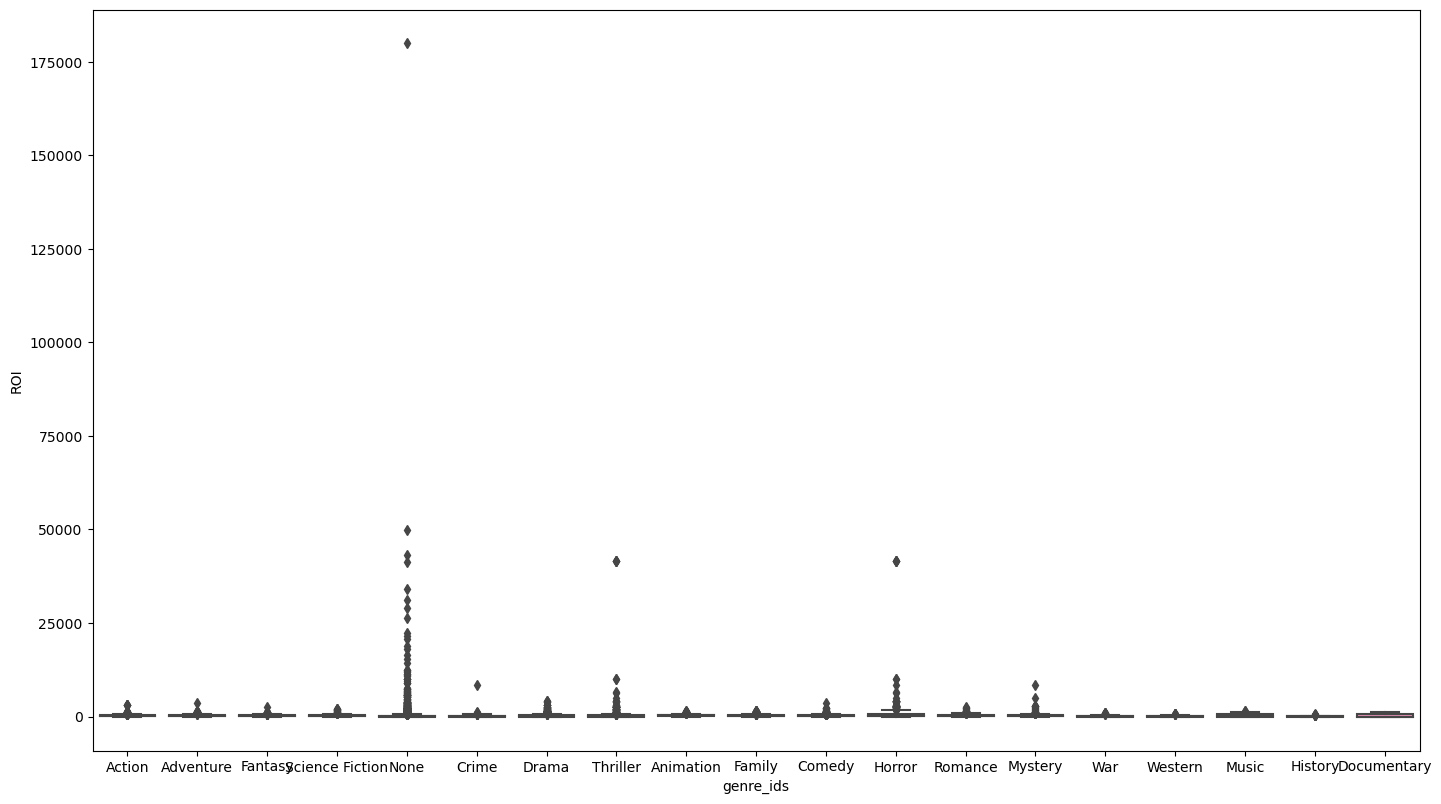

In [30]:
fig, ax = plt.subplots(figsize = (14, 8))
plt.tight_layout()
sns.boxplot(data = df, x = "genre_ids", y = "ROI", ax = ax )

In [34]:
df.groupby(["genre_ids"])[["ROI", "prod_budget"]].mean().sort_values("ROI", ascending = False)

,ROI,prod_budget
genre_ids,,
Horror,1168.257102,2.672155e+07
Thriller,526.717227,4.383447e+07
Mystery,394.241355,3.278276e+07
None,373.219391,3.043323e+07
Music,337.068882,3.409633e+07
Animation,307.816081,1.067827e+08
Family,271.989517,1.011750e+08
Fantasy,266.812654,1.299120e+08
Romance,260.400755,3.861713e+07


In [38]:
df.groupby(["genre_ids"])[["ROI", "prod_budget"]].mean().sort_values("prod_budget")
#df["genre_ids"].value_counts()

,ROI,prod_budget
genre_ids,,
Documentary,218.111553,6.637611e+06
Horror,1168.257102,2.672155e+07
None,373.219391,3.043323e+07
Mystery,394.241355,3.278276e+07
Music,337.068882,3.409633e+07
Drama,230.455898,3.729880e+07
History,58.464106,3.820727e+07
Romance,260.400755,3.861713e+07
Crime,145.088358,4.298961e+07


In [45]:
df.groupby(["director", "genre_ids"])[["ROI"]].mean().sort_values("ROI", ascending = False)

,,ROI
director,genre_ids,
Travis Cluff,Thriller,41556.474000
Chris Lofing,Thriller,41556.474000
Travis Cluff,Horror,41556.474000
Chris Lofing,Horror,41556.474000
William Brent Bell,Horror,6911.369173
...,...,...
Craig Moss,Comedy,-100.000000
Terron R. Parsons,None,-100.000000
Valentine,None,-100.000000
